In [1]:
import pandas as pd

In [3]:
data = pd.read_excel('excel_file.xlsx')

In [4]:
data

,Name,Author,Language,Text
0,«Морозко»,Народные,Русские,"Живало-бывало, – жил дед да с другой женой. У ..."
1,«Колобок»,Народные,Русские,Жил-был старик со старухою. Просит старик: «Ис...
2,«Теремок»,Народные,Русские,Стоит в поле теремок. Бежит мимо мышка-норушка...
3,«Репка»,Народные,Русские,"Посадил дед репку — выросла репка большая, пре..."
4,«Крошечка-Хаврошечка»,Народные,Русские,"Вы знаете, что есть на свете люди и хорошие, е..."
...,...,...,...,...
4468,«Как бедняк отказался от богатства»,Народные,Аварские,Жил-был на свете богатый скотовод. Перед смерт...
4469,«Бедняк и куса»,Народные,Аварские,"Что рассказать, о чем не говорить? Жила не жил..."
4470,"«Орешек, пестик, шило и лопатка»",Народные,Абхазские,"Жили-были Орешек, Пестик, Шило и Лопатка. Реши..."
4471,«Напрасная предусмотрительность»,Народные,Абхазские,Село Абжаква издавна славилось своим кислым мо...


In [5]:
# Удалим ненужный столбец:

In [6]:
data = data.drop(['Author'], axis=1)

In [7]:
data

,Name,Language,Text
0,«Морозко»,Русские,"Живало-бывало, – жил дед да с другой женой. У ..."
1,«Колобок»,Русские,Жил-был старик со старухою. Просит старик: «Ис...
2,«Теремок»,Русские,Стоит в поле теремок. Бежит мимо мышка-норушка...
3,«Репка»,Русские,"Посадил дед репку — выросла репка большая, пре..."
4,«Крошечка-Хаврошечка»,Русские,"Вы знаете, что есть на свете люди и хорошие, е..."
...,...,...,...
4468,«Как бедняк отказался от богатства»,Аварские,Жил-был на свете богатый скотовод. Перед смерт...
4469,«Бедняк и куса»,Аварские,"Что рассказать, о чем не говорить? Жила не жил..."
4470,"«Орешек, пестик, шило и лопатка»",Абхазские,"Жили-были Орешек, Пестик, Шило и Лопатка. Реши..."
4471,«Напрасная предусмотрительность»,Абхазские,Село Абжаква издавна славилось своим кислым мо...


In [8]:
data['Text'][0]

'Живало-бывало, – жил дед да с другой женой. У деда была дочка и у бабы была дочка. Все знают, как за мачехой жить: перевернешься – бита и недовернешься – бита. А родная дочь что ни сделает – за все гладят по головке: умница. Падчерица и скотину поила-кормила, дрова и воду в избу носила, печь топила, избу мела еще до свету… Ничем старухе не угодить – все не так, все худо. Ветер хоть пошумит, да затихнет, а старая баба расходится – не скоро уймется. Вот мачеха и придумала падчерицу со свету сжить. — Вези, вези ее, старик, – говорит мужу, – куда хочешь, чтобы мои глаза ее не видали! Вези ее в лес, на трескучий мороз. Старик затужил, заплакал, однако делать нечего, бабы не переспоришь. Запряг лошадь: – Садись, милая дочь, в сани. Повез бездомную в лес, свалил в сугроб под большую ель и уехал. Девушка сидит под елью, дрожит, озноб ее пробирает. Вдруг слышит – невдалеке Морозко по елкам потрескивает, с елки на елку поскакивает, пощелкивает. Очутился на той ели, под которой девица сидит, и с

In [9]:
# Удалим всю пунктуацию, лишние пробелы и приведем текст к нижнему регистру:

In [10]:
import string
string.punctuation += '—«»—…–“”'
transtab = str.maketrans(dict.fromkeys(string.punctuation, ' '))
data = data.assign(Text=data['Text'].str.translate(transtab))

In [11]:
data['Text'] = pd.Series([i.replace('\n',' ').replace('\r\n',' ').replace('  ',' ').replace('  ',' ') for i in data['Text']])
data['Text'] = data['Text'].map(lambda x: x.lower())

In [12]:
data['Text'][0]

'живало бывало жил дед да с другой женой у деда была дочка и у бабы была дочка все знают как за мачехой жить перевернешься бита и недовернешься бита а родная дочь что ни сделает за все гладят по головке умница падчерица и скотину поила кормила дрова и воду в избу носила печь топила избу мела еще до свету ничем старухе не угодить все не так все худо ветер хоть пошумит да затихнет а старая баба расходится не скоро уймется вот мачеха и придумала падчерицу со свету сжить вези вези ее старик говорит мужу куда хочешь чтобы мои глаза ее не видали вези ее в лес на трескучий мороз старик затужил заплакал однако делать нечего бабы не переспоришь запряг лошадь садись милая дочь в сани повез бездомную в лес свалил в сугроб под большую ель и уехал девушка сидит под елью дрожит озноб ее пробирает вдруг слышит невдалеке морозко по елкам потрескивает с елки на елку поскакивает пощелкивает очутился на той ели под которой девица сидит и сверху ее спрашивает тепло ли тебе девица тепло морозушко тепло бат

In [13]:
# Удалим стоп-слова и превратим тексты в токены:

In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words = stopwords.words('russian')
stop_words.extend(['это', 'э', 'эх', 'свой', 'тот', 'один', 'который', 'мой', 'такой', 'ты', 'какой', 'наш', 'сам', 'весь', 'тяф', 'еи', 'ам', 'ух', 'ои', 'неи', 'тяв'])

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(word_tokenize(str(sentence)))

In [17]:
table = data.Text.values.tolist()
data_words = list(sent_to_words(table))

In [18]:
data_words = [[word for word in i if word not in stop_words] for i in data_words]

In [18]:
# Удалим слова, которые встречаются меньше 5-ти раз во всем корпусе:

In [19]:
import itertools
united_list=list(itertools.chain.from_iterable(data_words))

In [20]:
from nltk import FreqDist

In [21]:
fdist = FreqDist(united_list)

In [22]:
fdist = dict(fdist)

In [23]:
rare_words_remove = [k for k,v in fdist.items() if v<= 5]

In [24]:
clean_data_words = [[word for word in i if word not in rare_words_remove] for i in data_words]

In [25]:
# Для лемматизации можно использовать pymorphy или Mystem. 
# Mystem работает медленнее pymorphy, но результат получается лучше.

In [26]:
# import pymorphy2
# morph_analyzer = pymorphy2.MorphAnalyzer()

In [27]:
# Скрипт для pymorphy для поиска всех слов:

In [28]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i))] for i in clean_data_words]

In [29]:
# Скрипт для поиска существительных, прилагательных и глаголов:

In [30]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i)) if morph_analyzer.parse(i[y])[0].tag.POS == 'NOUN' or morph_analyzer.parse(i[y])[0].tag.POS == 'ADJF' or morph_analyzer.parse(i[y])[0].tag.POS == 'VERB'] for i in clean_data_words]

In [31]:
# Скрипт для поиска существительных и глаголов:

In [32]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i)) if morph_analyzer.parse(i[y])[0].tag.POS == 'NOUN' or morph_analyzer.parse(i[y])[0].tag.POS == 'VERB'] for i in clean_data_words]

In [33]:
# Скрипт для Mystem:

In [25]:
clean_data_words = [' '.join(i) for i in clean_data_words]

In [26]:
from pymystem3 import Mystem
mystem = Mystem()

In [27]:
words_analized = [mystem.analyze(i) for i in clean_data_words]

In [ ]:
# Скрипт для поиска всех слов:

In [ ]:
# clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis')] for i in words_analized] 

In [ ]:
# Скрипт для поиска существительных, прилагательных и глаголов:

In [28]:
clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis') and parse['analysis'][0]['gr'].startswith(('S,', 'A=', 'A,', 'V,'))] for i in words_analized]

In [ ]:
 # Скрипт для поиска существительных и глаголов:

In [ ]:
# clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis') and parse['analysis'][0]['gr'].startswith(('S,', 'V,'))] for i in words_analized]

In [47]:
clean_lemmas[0]

['жить',
 'дед',
 'жена',
 'дед',
 'дочка',
 'баба',
 'дочка',
 'знать',
 'мачеха',
 'жить',
 'родной',
 'дочь',
 'сделать',
 'головка',
 'умница',
 'падчерица',
 'скотина',
 'поить',
 'кормить',
 'дрова',
 'вода',
 'изба',
 'носить',
 'печь',
 'топить',
 'изба',
 'мел',
 'свет',
 'старуха',
 'угождать',
 'ветер',
 'старый',
 'баба',
 'расходиться',
 'униматься',
 'мачеха',
 'придумывать',
 'падчерица',
 'свет',
 'сживать',
 'старик',
 'говорить',
 'муж',
 'хотеть',
 'глаз',
 'видать',
 'лес',
 'трескучий',
 'мороз',
 'старик',
 'затужить',
 'заплакать',
 'делать',
 'баба',
 'лошадь',
 'садиться',
 'милый',
 'дочь',
 'сани',
 'повезти',
 'лес',
 'сугроб',
 'большой',
 'ель',
 'уезжать',
 'девушка',
 'сидеть',
 'ель',
 'дрожать',
 'слышать',
 'морозко',
 'потрескивать',
 'елка',
 'елка',
 'пощелкивать',
 'очутиться',
 'есть',
 'девица',
 'сидеть',
 'девица',
 'морозушко',
 'батюшка',
 'морозко',
 'становиться',
 'спускаться',
 'потрескивать',
 'пощелкивать',
 'девица',
 'красный',
 'дух

In [30]:
data['Lemmas'] = [', '.join(item) for item in clean_lemmas]

In [31]:
data = data.drop(['Text'], axis=1)

In [32]:
data

,Name,Language,Lemmas
0,«Морозко»,Русские,"жить, дед, жена, дед, дочка, баба, дочка, знат..."
1,«Колобок»,Русские,"жить, старик, старуха, просить, старик, испечь..."
2,«Теремок»,Русские,"стоять, поле, теремок, бежать, мышка, норушка,..."
3,«Репка»,Русские,"посадить, дед, репка, вырастать, большой, преб..."
4,«Крошечка-Хаврошечка»,Русские,"знать, свет, человек, хороший, бог, бояться, б..."
...,...,...,...
4468,«Как бедняк отказался от богатства»,Аварские,"жить, свет, богатый, смерть, завещать, стадо, ..."
4469,«Бедняк и куса»,Аварские,"говорить, жить, жить, хун, бедный, старуха, ед..."
4470,"«Орешек, пестик, шило и лопатка»",Абхазские,"жить, орешек, пестик, шило, лопатка, решать, у..."
4471,«Напрасная предусмотрительность»,Абхазские,"село, кислый, молоко, человек, село, сбривать,..."


In [219]:
# Подсчитаем tfidf:

In [33]:
corpus = [' '.join(item) for item in clean_lemmas]

In [34]:
from operator import itemgetter
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=5,
                                 use_idf=True, sublinear_tf=True, norm='l2')
tfidf = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names()

In [36]:
def freq(text):
    
    text_freq = []
    
    for document in corpus:
        X = tfidf_vectorizer.transform([document])
        tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
        freq_list = [(word, freq) for word, freq in sorted(tfidf_scores, 
                                                       key=itemgetter(1), 
                                                       reverse=True)]
        freq_list = dict(freq_list)
        text_freq.append(freq_list)
             
    return text_freq

In [37]:
frequency = freq(corpus)

In [38]:
frequency[0]

{'старухин': 0.2228474780397123,
 'стариков': 0.2009178516732731,
 'блин': 0.19635934311525777,
 'собачка': 0.1735560606748626,
 'мороз': 0.17201196133662233,
 'падчерица': 0.15627994650061725,
 'елка': 0.15544392211094674,
 'хрыч': 0.15540548691131403,
 'потрескивать': 0.1522593108274557,
 'сани': 0.15202778633258265,
 'мачеха': 0.14438458555623085,
 'сугроб': 0.13414967878190645,
 'девица': 0.13152473104976325,
 'серебро': 0.127456129266725,
 'косточка': 0.1220900631346043,
 'ель': 0.11840431905954149,
 'короб': 0.11396649227118352,
 'затужить': 0.11264847271966376,
 'поглядывать': 0.10941643251467725,
 'красный': 0.10902265387579917,
 'заголосить': 0.10823111616617817,
 'грешный': 0.10823111616617817,
 'шуба': 0.10385600906312491,
 'заскрипеть': 0.10255281621483409,
 'баба': 0.1020065524105555,
 'дочь': 0.1015897036326444,
 'повезти': 0.10069768702288365,
 'умница': 0.097815712646828,
 'жених': 0.0952691767552833,
 'поминки': 0.09455822417497096,
 'хоронить': 0.09113914015848466,
 '

In [49]:
# keys = [item.keys() for item in frequency]

In [39]:
items = [', '.join("{}: {}".format(k, v) for k, v in i.items()) for i in frequency]

In [80]:
# Выведем топ-20 слов в отдельный столбец:

In [40]:
import collections
top_20 = [dict(collections.Counter(item).most_common(20)) for item in frequency]

In [41]:
top_20[0]

{'старухин': 0.2228474780397123,
 'стариков': 0.2009178516732731,
 'блин': 0.19635934311525777,
 'собачка': 0.1735560606748626,
 'мороз': 0.17201196133662233,
 'падчерица': 0.15627994650061725,
 'елка': 0.15544392211094674,
 'хрыч': 0.15540548691131403,
 'потрескивать': 0.1522593108274557,
 'сани': 0.15202778633258265,
 'мачеха': 0.14438458555623085,
 'сугроб': 0.13414967878190645,
 'девица': 0.13152473104976325,
 'серебро': 0.127456129266725,
 'косточка': 0.1220900631346043,
 'ель': 0.11840431905954149,
 'короб': 0.11396649227118352,
 'затужить': 0.11264847271966376,
 'поглядывать': 0.10941643251467725,
 'красный': 0.10902265387579917}

In [42]:
top_20_words = [', '.join(item.keys()) for item in top_20]

In [43]:
data['Frequency'] = pd.Series(items)

In [44]:
data['Top_20'] = pd.Series(top_20_words)

In [45]:
data

,Name,Language,Lemmas,Frequency,Top_20
0,«Морозко»,Русские,"жить, дед, жена, дед, дочка, баба, дочка, знат...","старухин: 0.2228474780397123, стариков: 0.2009...","старухин, стариков, блин, собачка, мороз, падч..."
1,«Колобок»,Русские,"жить, старик, старуха, просить, старик, испечь...","колобок: 0.4298907243370916, короб: 0.29645475...","колобок, короб, сметана, катиться, мордочка, п..."
2,«Теремок»,Русские,"стоять, поле, теремок, бежать, мышка, норушка,...","терем: 0.37870184366407955, зайчик: 0.28222755...","терем, зайчик, бочок, лисичка, волчок, сестрич..."
3,«Репка»,Русские,"посадить, дед, репка, вырастать, большой, преб...","дедок: 0.4166370835028384, дедка: 0.4008957342...","дедок, дедка, бабка, внучка, вытягивать, потян..."
4,«Крошечка-Хаврошечка»,Русские,"знать, свет, человек, хороший, бог, бояться, б...","коровушка: 0.2812984811668194, травушка: 0.217...","коровушка, травушка, яблочко, глазок, наткать,..."
...,...,...,...,...,...
4468,«Как бедняк отказался от богатства»,Аварские,"жить, свет, богатый, смерть, завещать, стадо, ...","могила: 0.3117705697397156, осел: 0.2458278946...","могила, осел, бедняк, наследство, достояние, б..."
4469,«Бедняк и куса»,Аварские,"говорить, жить, жить, хун, бедный, старуха, ед...","кус: 0.3635717105305819, зурна: 0.232714151243...","кус, зурна, осел, бычок, вах, туман, бык, прот..."
4470,"«Орешек, пестик, шило и лопатка»",Абхазские,"жить, орешек, пестик, шило, лопатка, решать, у...","орешек: 0.3587108244528939, шило: 0.2787509004...","орешек, шило, лопатка, богач, котел, бык, черд..."
4471,«Напрасная предусмотрительность»,Абхазские,"село, кислый, молоко, человек, село, сбривать,...","сбривать: 0.5671193119557402, кислый: 0.444769...","сбривать, кислый, ус, село, поговорка, молоко,..."


In [48]:
data.to_excel('Frequency.xlsx', encoding='utf-8', index=False)

In [ ]:
# Введем название какой-нибудь сказки и найдем 10 похожих текстов:

In [49]:
data = pd.read_excel('excel_file.xlsx')

In [50]:
data = data.drop(['Author', 'Text'], axis=1)

In [51]:
data

,Name,Language
0,«Морозко»,Русские
1,«Колобок»,Русские
2,«Теремок»,Русские
3,«Репка»,Русские
4,«Крошечка-Хаврошечка»,Русские
...,...,...
4468,«Как бедняк отказался от богатства»,Аварские
4469,«Бедняк и куса»,Аварские
4470,"«Орешек, пестик, шило и лопатка»",Абхазские
4471,«Напрасная предусмотрительность»,Абхазские


In [52]:
input_name = input('Введите название сказки из столбца "Name". ').strip("!?,)(:;\'\".").lower()

Введите название сказки из столбца "Name". морозко


In [53]:
data["Name1"] = data["Name"].str.lower()

In [54]:
res = data[data["Name1"].str.contains(input_name)]

In [55]:
res = res.iloc[0:4474, 0:2]

In [56]:
str = data["Name1"]
if data["Name1"].str.contains(input_name,regex=False).any():
    print(res)
else: 
    print ("В базе данных нет такой сказки.")

                                Name Language
0                          «Морозко»  Русские
1925  «Морозко (изложение Толстого)»  Русские


In [57]:
index = input("Введите индекс сказки из первого столбца. Если есть несколько сказок с одинаковым названием, введите индекс нужной сказки ")
inp = int(index)

Введите индекс сказки из первого столбца. Если есть несколько сказок с одинаковым названием, введите индекс нужной сказки 0


In [58]:
inp_plus_1 = inp + 1

In [59]:
inp_plus_1

1

In [60]:
from sklearn.metrics.pairwise import linear_kernel

In [61]:
cosine_similarities = linear_kernel(tfidf[inp:inp_plus_1], tfidf).flatten()

In [62]:
data['Cosine_Sim'] = cosine_similarities

In [63]:
result_idx = cosine_similarities.argsort()[:-12:-1]

In [64]:
new_df = pd.DataFrame({'Name': data['Name'][result_idx],'Cosine_Sim': data['Cosine_Sim'][result_idx]})

In [65]:
# Первый текст в списке - это текст из запроса.

In [66]:
new_df

,Name,Cosine_Sim
0,«Морозко»,1.000000
1925,«Морозко (изложение Толстого)»,0.899632
268,«Дочь и падчерица»,0.241601
3890,«Злая мачеха и добрая падчерица»,0.208919
91,«Волшебная дудочка»,0.204412
1429,«Жадная мачеха»,0.199273
97,«Падчерица»,0.198845
304,«Про кошечку и про собачку»,0.195032
1471,"«Здравствуй, мостик»",0.192367
10,«Двенадцать месяцев»,0.182892


In [276]:
# Создадим облако слов для каждого текста:

In [67]:
texts = [frequency[i] for i in result_idx]

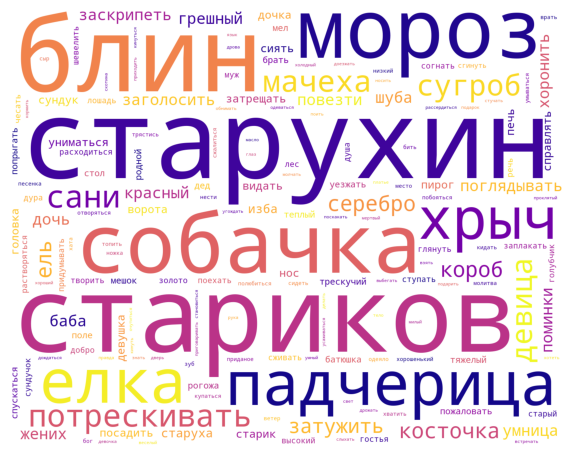

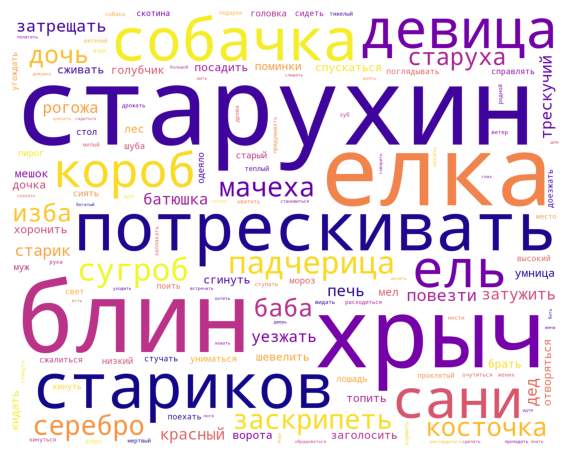

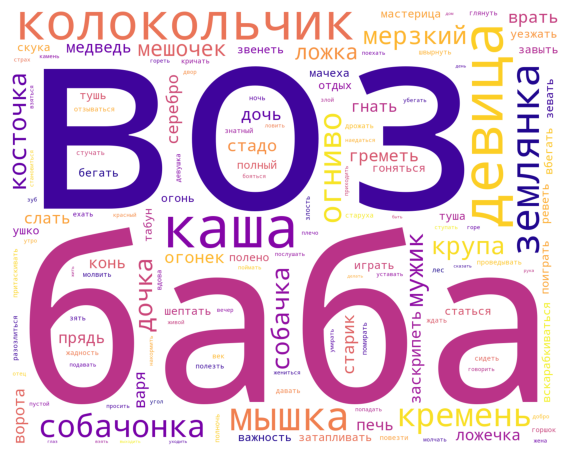

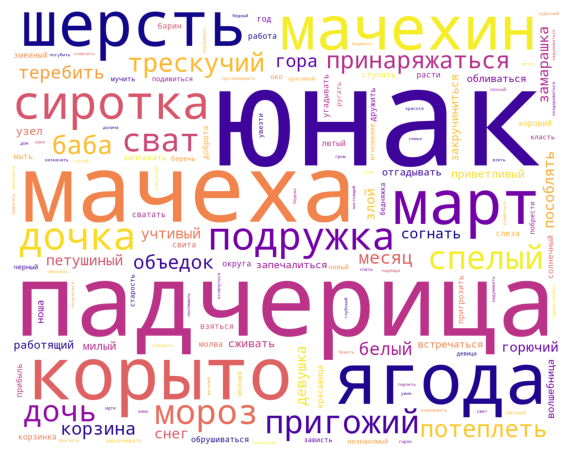

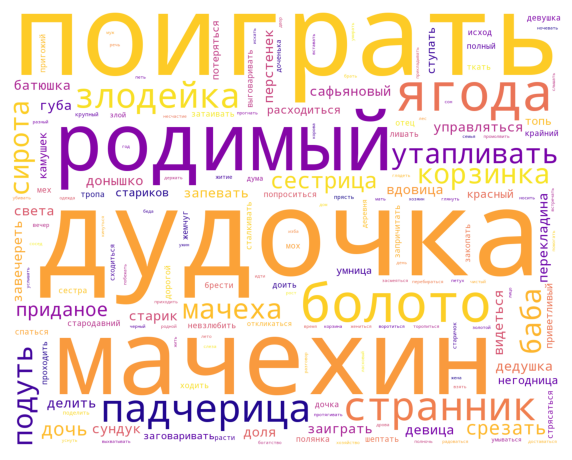

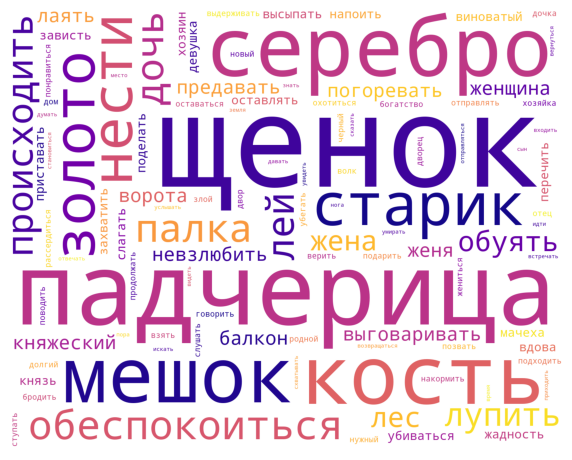

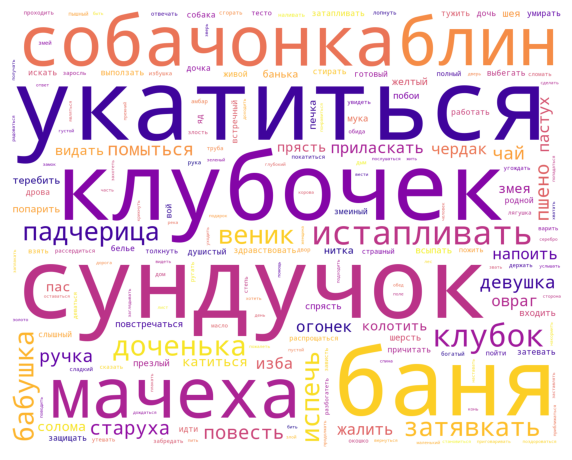

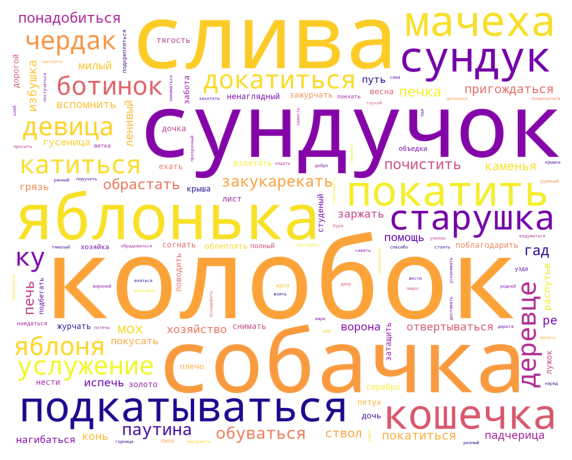

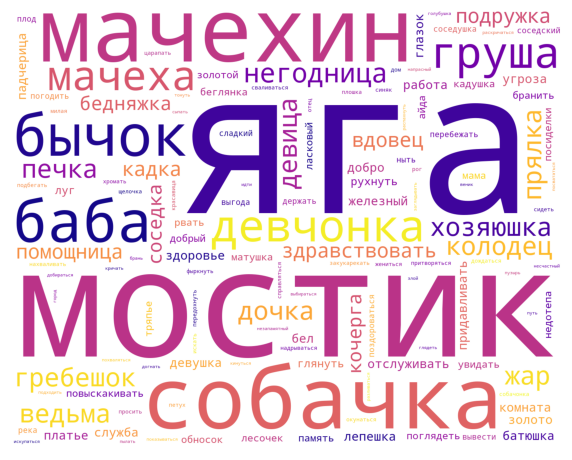

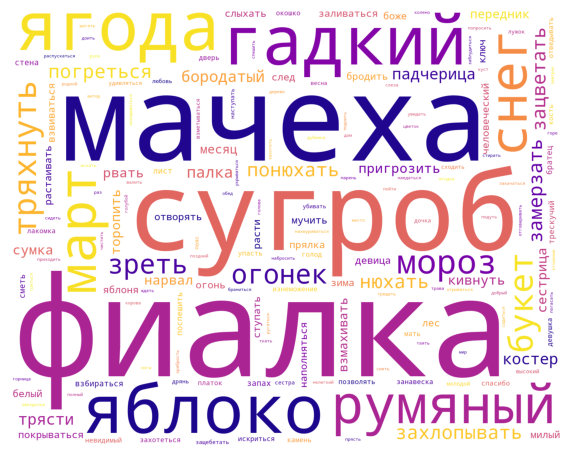

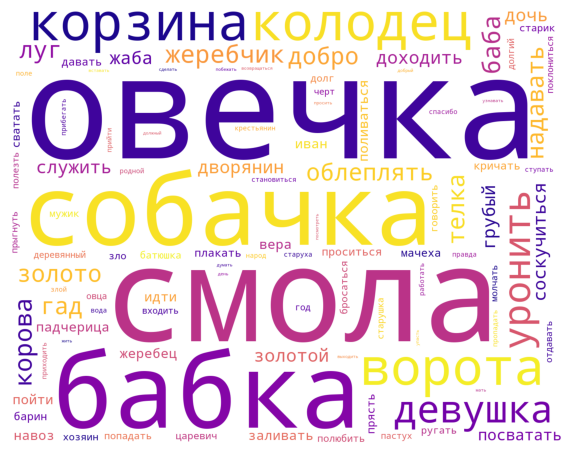

In [68]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
for i in texts:
    wc = WordCloud(max_words=1000, margin=10, background_color='white', colormap="plasma",
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(i)
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [97]:
# Можно находить похожие тексты, сравнивая топ-20 слов. 
# При совпадении слова в сказке из запроса и сказке из списка, в счет сказки из списка добавляется 1 балл.
# Затем выводятся названия топ-10 сказок, в которых нашлось больше всего совпадений.

In [69]:
data1 = pd.read_excel('excel_file.xlsx')

In [70]:
data1 = data1.drop(['Author', 'Text', 'Language'], axis=1)

In [71]:
indicies = data1.index.tolist()

In [72]:
dict_words = dict(zip(indicies, top_20))

In [73]:
key_words =  list(dict_words[inp].keys())

In [74]:
import operator

def handler_dict(dicters,key_words):
    scores = {key:0 for key in dicters.keys()}
    for name_text,dicter in dicters.items():
        for key in dicter.keys():
            if key in key_words:
                scores[name_text]+=1        
    return scores

In [75]:
dict_scores = handler_dict(dict_words, key_words)

In [76]:
data1['Scores'] = dict_scores.values()

In [77]:
data1 = data1.sort_values(by = ['Scores'], ascending=False)

In [78]:
new_df_1 = data1.iloc[0:11]

In [79]:
new_df_1

,Name,Scores
0,«Морозко»,20
1925,«Морозко (изложение Толстого)»,16
10,«Двенадцать месяцев»,3
304,«Про кошечку и про собачку»,3
3890,«Злая мачеха и добрая падчерица»,3
97,«Падчерица»,3
1756,«Ночные плясуны»,3
1471,"«Здравствуй, мостик»",3
268,«Дочь и падчерица»,3
4,«Крошечка-Хаврошечка»,3


In [401]:
# Еще можно сравнить топ-20 слов по мере Жаккара:

In [80]:
data2 = pd.read_excel('Frequency.xlsx')

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
vectorizer = CountVectorizer()
corpus = data2['Top_20'].values.tolist()
X = vectorizer.fit_transform(corpus)
matrix = X.toarray()

In [83]:
from sklearn.metrics import jaccard_score

In [84]:
jacc = [jaccard_score(matrix[inp],i) for i in matrix]

In [85]:
import numpy as np

In [86]:
jacc = np.array(jacc)

In [87]:
data2['Jacc_Index'] = jacc

In [88]:
result_idx_2 = jacc.argsort()[:-12:-1]

In [89]:
new_df_2 = pd.DataFrame({'Name': data2['Name'][result_idx_2],'Jacc_Index': data2['Jacc_Index'][result_idx_2]})

In [90]:
new_df_2

,Name,Jacc_Index
0,«Морозко»,1.000000
1925,«Морозко (изложение Толстого)»,0.666667
304,«Про кошечку и про собачку»,0.081081
10,«Двенадцать месяцев»,0.081081
97,«Падчерица»,0.081081
3890,«Злая мачеха и добрая падчерица»,0.081081
1756,«Ночные плясуны»,0.081081
4,«Крошечка-Хаврошечка»,0.081081
268,«Дочь и падчерица»,0.081081
1471,"«Здравствуй, мостик»",0.081081


In [ ]:
# Построим столбчатые диаграммы для трех методов сравнения:

In [ ]:
# Соединим вместе индексы и названия из датафрема сравнения по косинусному сходству:

In [91]:
del str

In [92]:
new_df['Merged'] = new_df.index.fillna(' ').astype(str) +' '+ new_df['Name'].values.astype(str)

In [93]:
# Создадим словарь из соединенных индексов и имен + коэффициенты косинусного сходства.

In [94]:
names = new_df['Merged'].values.tolist()

In [95]:
cosine_similarities_dict = new_df['Cosine_Sim'].values.tolist()

In [96]:
dict_1 = dict(zip(names, cosine_similarities_dict))

In [97]:
texts = list(dict_1.keys())
values = list(dict_1.values())

In [98]:
# Соединим вместе индексы и названия из датафрейма сравнения по топ-20 слов:

In [99]:
new_df_1 = new_df_1.copy()

In [100]:
new_df_1['Merged'] = new_df_1.index.fillna(' ').astype(str) +' '+ new_df_1['Name'].values.astype(str)

In [101]:
# Создадим словарь из соединенных индексов и имен + баллы сравнения по топ-20 слов:

In [102]:
names1 = new_df_1['Merged'].values.tolist()

In [103]:
scores_dict = new_df_1['Scores'].values.tolist()

In [104]:
dict_2 = dict(zip(names1, scores_dict))

In [105]:
texts1 = list(dict_2.keys())
values1 = list(dict_2.values())

In [106]:
# Соединим вместе индексы и названия из датафрейма сравнения по мере Жаккара:

In [107]:
new_df_2['Merged'] = new_df_2.index.fillna(' ').astype(str) +' '+ new_df_2['Name'].values.astype(str)

In [108]:
jacc_index_dict = new_df_2['Jacc_Index'].values.tolist()

In [109]:
# Создадим словарь из соединенных индексов и имен + коэффициенты сравнения по мере Жаккара:

In [110]:
names2 = new_df_2['Merged'].values.tolist()

In [111]:
dict_3 = dict(zip(names2, jacc_index_dict))

In [112]:
texts2 = list(dict_3.keys())
values2 = list(dict_3.values())

In [113]:
# Нарисуем столбчатые диаграммы отдельно для каждого метода:

Text(0.5, 1.0, 'Jaccard index')

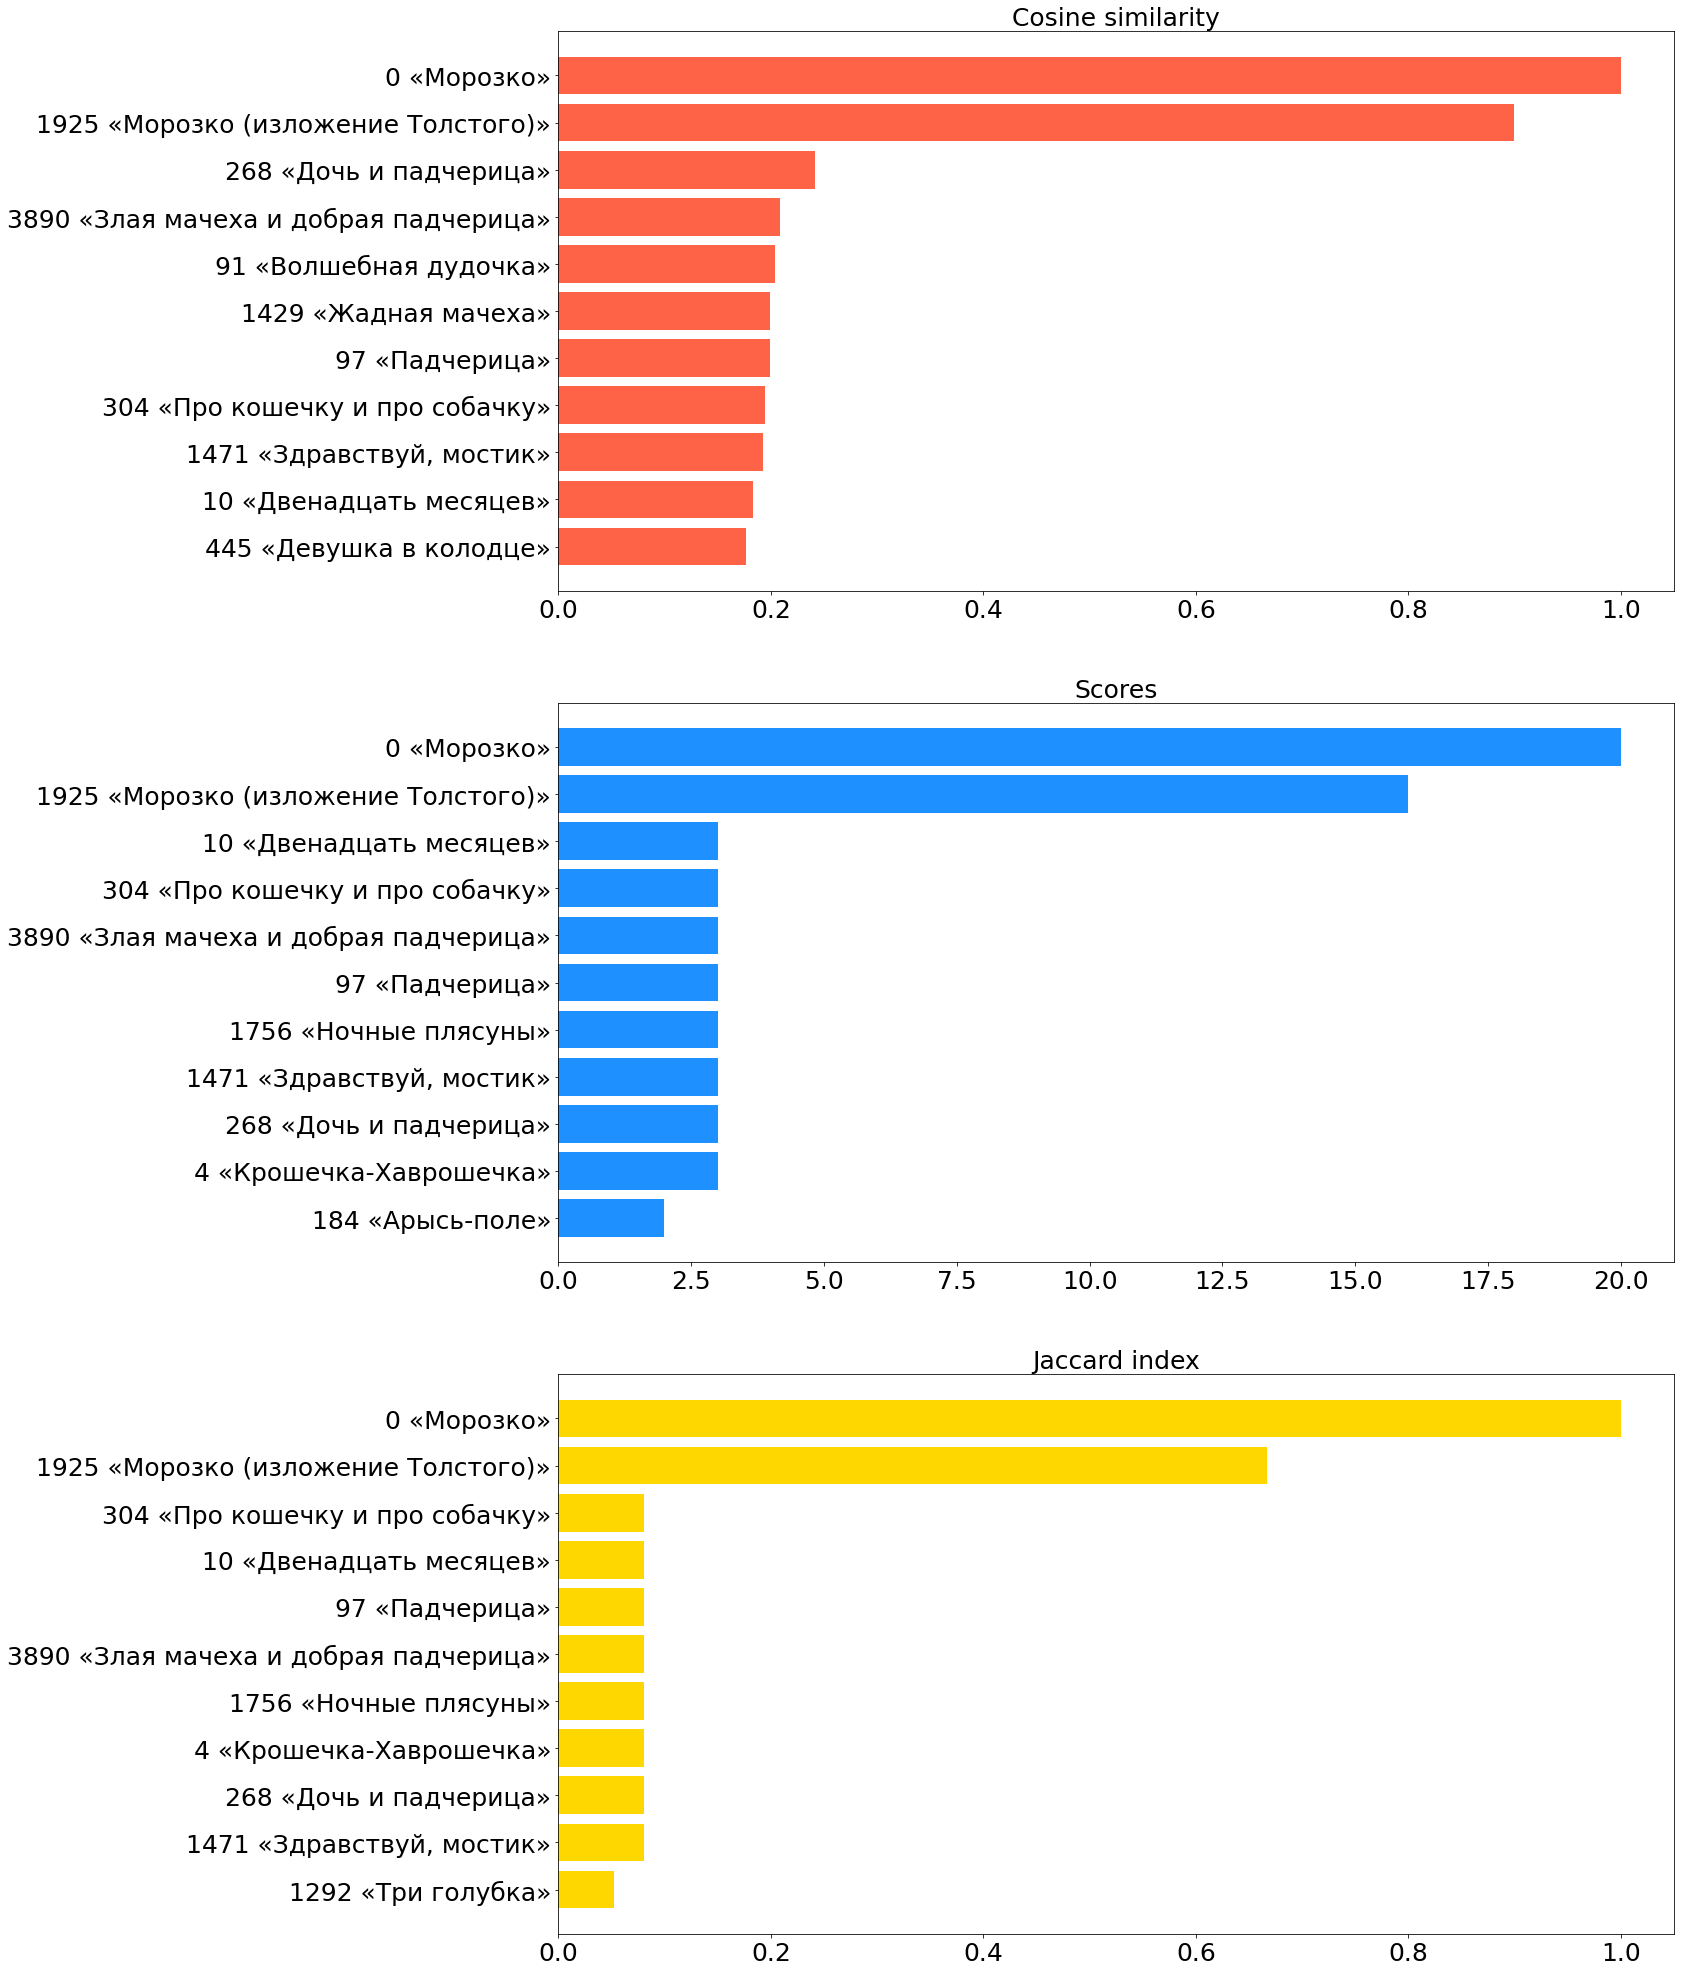

In [114]:
import matplotlib.ticker as ticker
import matplotlib 
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
fig, axes = plt.subplots(3, 1, figsize=(20, 35))

axes[0].barh(texts, values, color = 'Tomato')
axes[1].barh(texts1, values1, label = "Top-20", color = 'DodgerBlue')
axes[2].barh(texts2, values2, color = 'Gold')
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[2].invert_yaxis()
axes[0].set_title('Cosine similarity', fontsize = 25)
axes[1].set_title('Scores', fontsize = 25)
axes[2].set_title('Jaccard index', fontsize = 25)

In [115]:
# Сравним столбчатые диаграммы для для 3-х методов:

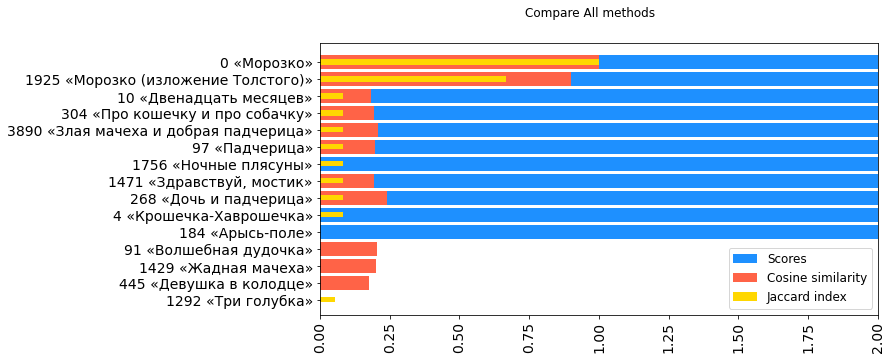

In [116]:
fig, axs = plt.subplots(figsize=(10, 5), sharey=True)

axs.barh(texts1, values1, color = 'DodgerBlue', label = "Scores")
axs.barh(texts, values, label = "Cosine similarity", color = 'Tomato')
axs.barh(texts2, values2, color = 'Gold', label = "Jaccard index", height = 0.3)

legend=plt.legend(loc = 'best', fontsize=12)
plt.xticks(rotation=90)  
plt.tick_params(axis='both', which='major', labelsize=14)
fig.suptitle('Compare All methods')
plt.xlim([0,2])
axs.invert_yaxis()

In [172]:
# Запишем полученные результаты в датафрем:

In [117]:
df_3 = pd.DataFrame({'Name': texts,'Cosine_Similarity': values, 'Name1': texts1,'Scores': values1, 'Name2': texts2,'Jaccard_Index': values2})

In [118]:
df_3

,Name,Cosine_Similarity,Name1,Scores,Name2,Jaccard_Index
0,0 «Морозко»,1.000000,0 «Морозко»,20,0 «Морозко»,1.000000
1,1925 «Морозко (изложение Толстого)»,0.899632,1925 «Морозко (изложение Толстого)»,16,1925 «Морозко (изложение Толстого)»,0.666667
2,268 «Дочь и падчерица»,0.241601,10 «Двенадцать месяцев»,3,304 «Про кошечку и про собачку»,0.081081
3,3890 «Злая мачеха и добрая падчерица»,0.208919,304 «Про кошечку и про собачку»,3,10 «Двенадцать месяцев»,0.081081
4,91 «Волшебная дудочка»,0.204412,3890 «Злая мачеха и добрая падчерица»,3,97 «Падчерица»,0.081081
5,1429 «Жадная мачеха»,0.199273,97 «Падчерица»,3,3890 «Злая мачеха и добрая падчерица»,0.081081
6,97 «Падчерица»,0.198845,1756 «Ночные плясуны»,3,1756 «Ночные плясуны»,0.081081
7,304 «Про кошечку и про собачку»,0.195032,"1471 «Здравствуй, мостик»",3,4 «Крошечка-Хаврошечка»,0.081081
8,"1471 «Здравствуй, мостик»",0.192367,268 «Дочь и падчерица»,3,268 «Дочь и падчерица»,0.081081
9,10 «Двенадцать месяцев»,0.182892,4 «Крошечка-Хаврошечка»,3,"1471 «Здравствуй, мостик»",0.081081
